In [71]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
#from io import BytesIO
#from zipfile import ZipFile
#from botocore.client import Config

from sklearn.model_selection import train_test_split
#from sklearn import svm
from sklearn.metrics import accuracy_score
#import pywt
#from scipy.io import wavfile
import librosa    
import glob
#import cv2
#import wave
#from scipy.fftpack import fft,fftfreq
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import optimizers
import keras
import tensorflow_addons as tfa


In [24]:
audio_data = []
labels = []
sampling_rate = []
file_names = []

In [25]:
data, samplerate = librosa.load("/content/drive/MyDrive/Pitt/Cookie/train/train/DEMENTIA/001-0.wav", sr=44000) # Downsample 44.1kHz to 8kHz

print(data.shape)
print(samplerate)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(2428657,)
44000


In [26]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:
    
    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

55.19675
2.272727272727273e-05
175999.9275319652


In [30]:
classes = []
label_number=0
audio_data = []
labels = []
sampling_rate = []
file_names = []
data = []
noisy_removed=[]
noise=[]
Normal = glob.glob('/content/drive/MyDrive/Pitt/Cookie/train/train/NORMAL/*.*')
Dimentia = glob.glob('/content/drive/MyDrive/Pitt/Cookie/train/train/DEMENTIA/*.*')
for i in Normal:   
    y, s = librosa.load(i, sr=44000)
    #reduced_noise = nr.reduce_noise(audio_clip=y, noise_clip=y, verbose=False)
        #print(s)
        #print(j)
    data.append([y,0])
        #noise.append(y)
        #labels.append(label_number)
for j in Dimentia:   
    y, s = librosa.load(j, sr=44000)
    data.append([y,1])



/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [32]:
import random

random.shuffle(data)
audio_data=[]
labels=[]
for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [31]:
len(data)

140

In [33]:
print(labels[0])

0


In [34]:
save_path='/content/drive/MyDrive/Pitt/roaster_before.jpg'
plt.plot(time_divion[0:192000],audio_data[11][0:192000])
#plt.show()
plt.title('signal in real time')
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()
#plt.plot(time_divion[0:192000],audio_data[4][0:192000])
#plt.show()

In [35]:
example = 15
mfcc = librosa.feature.mfcc(y=audio_data[example])
print(mfcc.shape)
print(labels[example])

(20, 7117)
1


Text(0.5, 1.0, 'Mel Frequency Cepstral Coefficient')

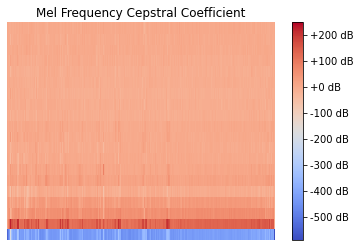

In [36]:
save_path = '/content/drive/MyDrive/Pitt/roaster.jpg'

plt.axis('off') # no axis
librosa.display.specshow(mfcc)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Frequency Cepstral Coefficient')

In [37]:
mfcc = []
for i in range (0,140):
    if i%10 == 0:
        print(i)
    mf = librosa.feature.mfcc(y=audio_data[i])
    
    mf=mf.reshape(-1,1)
  

    mfcc.append(mf[:8540])
    if mf.shape[0]<8600:
        print(mf.shape)
    
mfcc =np.array(mfcc) 
mfcc.shape

0
10
20
30
40
50
60
70
80
90
100
110
120
130


(140, 8540, 1)

In [38]:
mfcc=mfcc.reshape(140,-1)
mfcc.shape

(140, 8540)

In [39]:
from sklearn.preprocessing import MinMaxScaler
data = mfcc
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)


print(np.amax(mfcc))

normalized_features = scaler.transform(data)
print(np.amax(normalized_features))

271.34552
1.0000001


In [81]:
#from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.20, random_state=1150)
#clf = tree.DecisionTreeClassifier()
#clf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [82]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6785714285714286


In [43]:
features_convolution = np.reshape(normalized_features,(140,20, -1,1))

In [46]:
y=tf.keras.utils.to_categorical(labels, num_classes=2, dtype='float32')

In [78]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(2))
model.add(Activation('softmax'))
sgd =  tf.keras.optimizers.SGD(learning_rate=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              



In [70]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.9 MB/s 


In [79]:
history = model.fit(features_convolution, y,batch_size=16, epochs=40,validation_split=0.1)

Epoch 1/40
8/8 [==============================] - 1s 123ms/step - loss: 0.5929 - accuracy: 0.8016 - val_loss: 0.4795 - val_accuracy: 0.8571
Epoch 2/40
8/8 [==============================] - 1s 102ms/step - loss: 0.5191 - accuracy: 0.8016 - val_loss: 0.4662 - val_accuracy: 0.8571
Epoch 3/40
8/8 [==============================] - 1s 105ms/step - loss: 0.5085 - accuracy: 0.8016 - val_loss: 0.4471 - val_accuracy: 0.8571
Epoch 4/40
8/8 [==============================] - 1s 101ms/step - loss: 0.5423 - accuracy: 0.8016 - val_loss: 0.4572 - val_accuracy: 0.8571
Epoch 5/40
8/8 [==============================] - 1s 99ms/step - loss: 0.5106 - accuracy: 0.8016 - val_loss: 0.4808 - val_accuracy: 0.8571
Epoch 6/40
8/8 [==============================] - 1s 95ms/step - loss: 0.5292 - accuracy: 0.8016 - val_loss: 0.4520 - val_accuracy: 0.8571
Epoch 7/40
8/8 [==============================] - 1s 104ms/step - loss: 0.4820 - accuracy: 0.8016 - val_loss: 0.4640 - val_accuracy: 0.8571
Epoch 8/40
8/8 [======

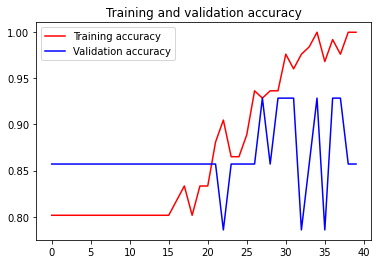

<Figure size 432x288 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
